In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import acquire
import prepare

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt', 'was']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

# Clean up the text file and label the columns
df = pd.read_csv('spam.csv', encoding='latin_1')
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(index=str, columns={"v1": "label", "v2": "text"})
df.head()

from wordcloud import WordCloud

In [2]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [3]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [4]:
all_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'a150',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'winner',
 'valued',
 'network',
 'cu

In [5]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [6]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


In [7]:
# What are the most frequently occuring words?
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
call,600,241,359
im,462,449,13
get,397,314,83
ur,384,240,144
go,304,273,31
4,287,168,119
dont,279,257,22
ok,277,272,5
free,275,59,216
know,267,241,26


In [8]:
# Are there any words that uniquely identify a spam or ham message?
pd.concat([word_counts[word_counts.spam == 0].sort_values(by='ham').tail(6),
           word_counts[word_counts.ham == 0].sort_values(by='spam').tail(6)])

,all,ham,spam
thats,94,94,0
i_,117,117,0
say,118,118,0
da,132,132,0
later,134,134,0
lor,160,160,0
awarded,38,0,38
18,43,0,43
guaranteed,50,0,50
tone,73,0,73


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

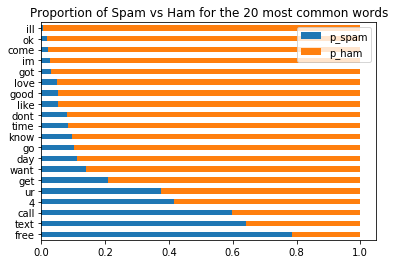

In [9]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')

In [10]:
(word_counts
 [(word_counts.spam > 10) & (word_counts.ham > 10)]
 .assign(ratio=lambda df: df.spam / (df.ham + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all,ham,spam,ratio
im,462,449,13,0.028953
good,235,223,12,0.053809
like,245,232,13,0.056032
need,182,171,11,0.064324
dont,279,257,22,0.085600
contact,70,14,56,3.997145
win,76,15,61,4.063957
cash,74,12,62,5.162365
mobile,150,15,135,8.994004
txt,163,13,150,11.529593


# Word Cloud

_An example..._

(-0.5, 399.5, 199.5, -0.5)

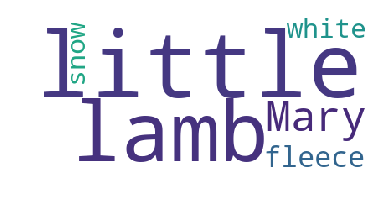

In [11]:
from wordcloud import WordCloud

sentence = 'Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow.'

img = WordCloud(background_color='white').generate(sentence)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

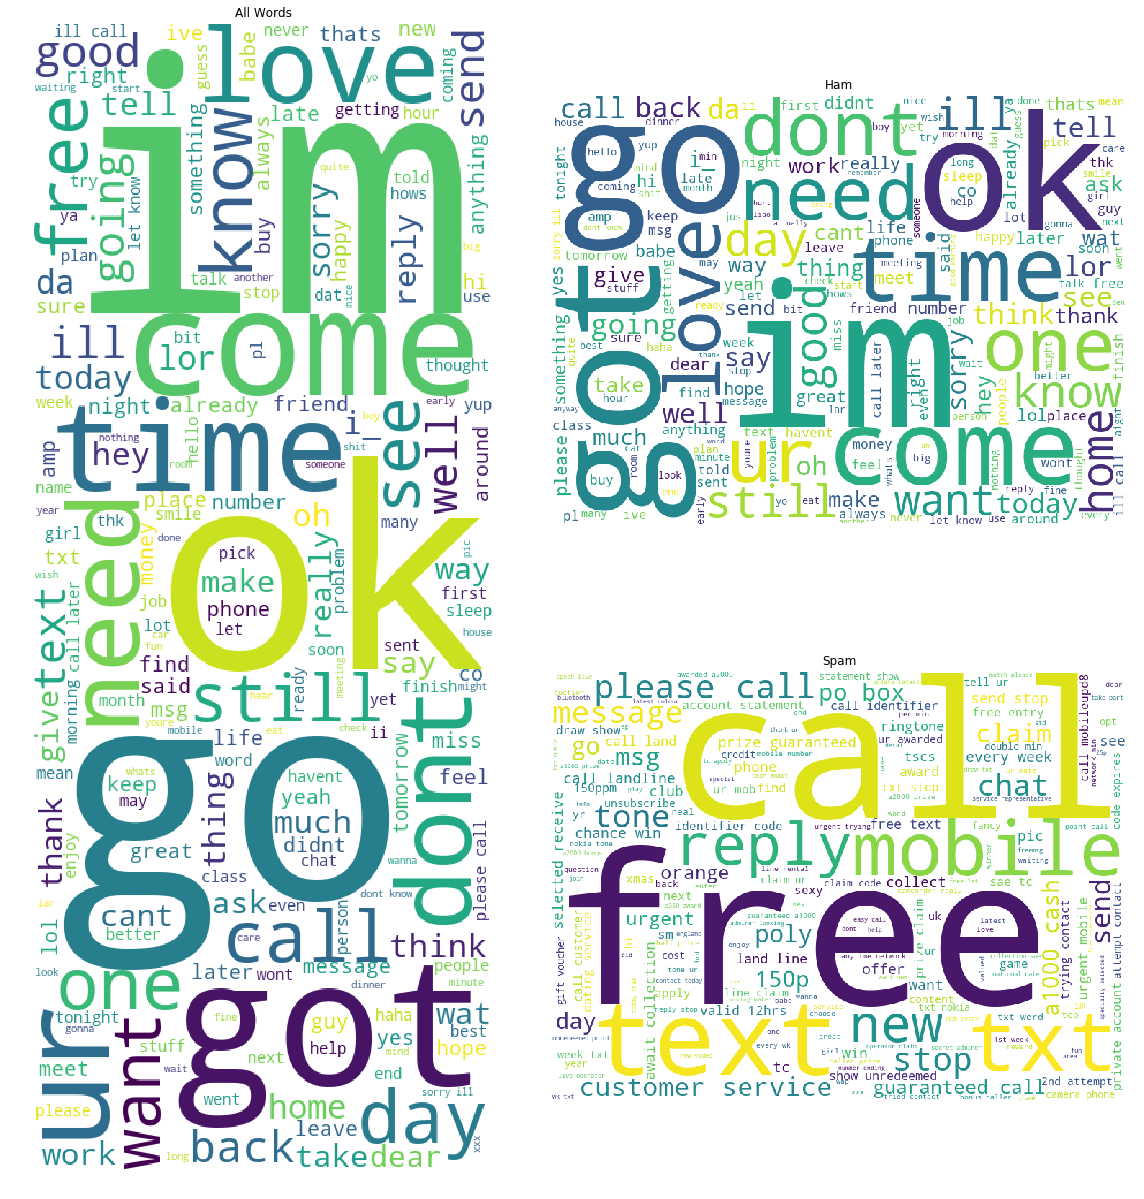

In [12]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(16, 16))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

# Bigrams

_An example..._

In [13]:
sentence = 'Mary had a little lamb'

bigrams = nltk.ngrams(sentence.split(), 2)
list(bigrams)

[('Mary', 'had'), ('had', 'a'), ('a', 'little'), ('little', 'lamb')]

## Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams? Is there any overlap in the bigrams for the spam data and the ham data?

_Both sets of words are very similar. 'call later', 'let know', 'ill call' appears in both spam and ham._

In [14]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

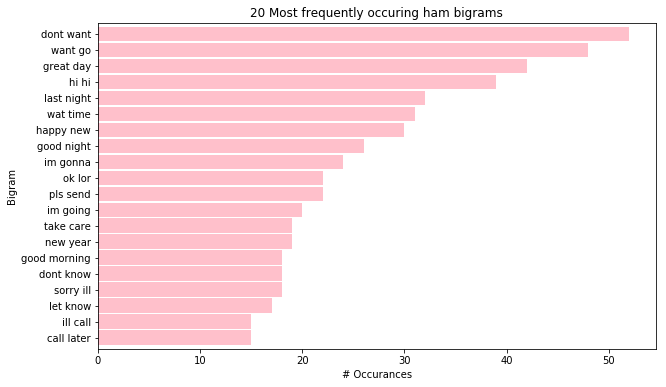

In [15]:
top_20_ham_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [16]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

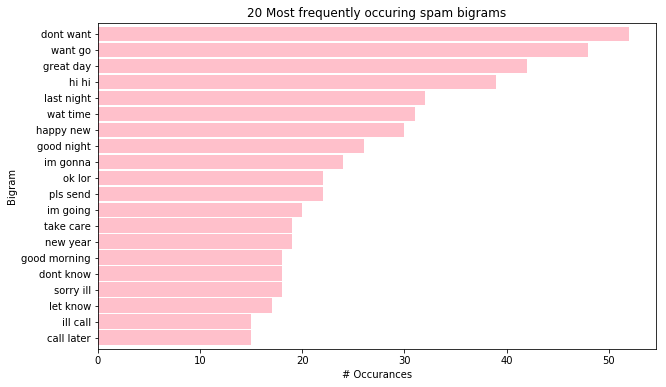

In [17]:
top_20_spam_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

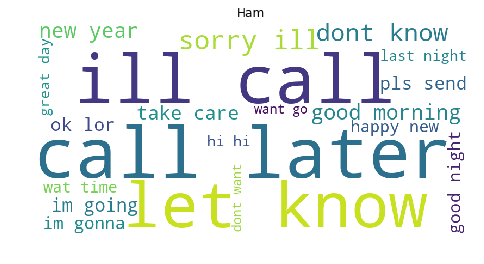

In [18]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


ham_data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(ham_data)
plt.figure(figsize=(8, 4))
plt.title('Ham', fontsize=12)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

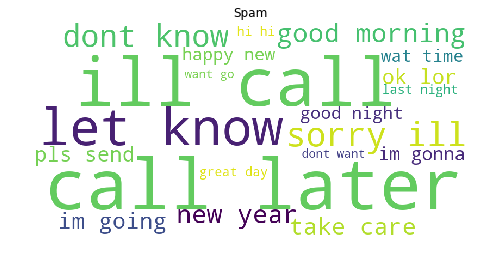

In [19]:
spam_data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(spam_data)
plt.figure(figsize=(8, 4))
plt.title('Spam', fontsize=12)
plt.imshow(img)
plt.axis('off')

## Explore the blog articles using the techniques discussed in the exploration lesson.

In [20]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [21]:
corpus = acquire.get_news_texts('business',
                                'sports',
                                'technology',
                                'entertainment')

/en/news/volkswagen-unit-porsche-fined-₹4100-crore-over-diesel-scandal-1557251200422
/en/news/guj-trader-who-gifted-cars-to-staff-to-remove-illegal-road-he-built-1557214245553
/en/news/ai-sent-₹2cr-to-nigeria-instead-of-us-firm-airline-says-probe-on-1557243035697
/en/news/indigo-talking-to-airbus-to-buy-yettobereleased-a321-xlr-jets-1557237922203
/en/news/us-warns-india-against-tariffs-over-scrapping-of-trade-benefits-1557245457108
/en/news/resigned-pledged-shares-provided-₹250-cr-to-banks-naresh-goyal-1557250273105
/en/news/we-cant-ensure-cheaper-oil-sales-to-india-after-iran-sanctions-us-1557222796840
/en/news/spacexs-billionaire-moon-tourist-says-has-no-money-selling-art-1557239146967
/en/news/infosys-makes-hyd-staff-pay-for-parking-activists-call-it-illegal-1557230142855
/en/news/britannia-broke-rules-by-not-reporting-wadias-arrest-ingovern-1557234445948
/en/news/apple-features-warren-buffett-in-its-1st-game-since-2008-1557237491109
/en/news/unsure-on-galaxy-fold-shipping-will-canc

In [22]:
prepare.prepare_article_data(corpus)
corpus

Removed 2 stopwords
---
Removed 2 stopwords
---
Removed 1 stopwords
---
Removed 1 stopwords
---
Removed 4 stopwords
---
Removed 2 stopwords
---
Removed 4 stopwords
---
Removed 3 stopwords
---
Removed 4 stopwords
---
Removed 3 stopwords
---
Removed 2 stopwords
---
Removed 2 stopwords
---
Removed 2 stopwords
---
Removed 3 stopwords
---
Removed 2 stopwords
---
Removed 1 stopwords
---
Removed 2 stopwords
---
Removed 4 stopwords
---
Removed 2 stopwords
---
Removed 5 stopwords
---
Removed 1 stopwords
---
Removed 0 stopwords
---
Removed 3 stopwords
---


[{'title': 'GoT makers admit Starbucks cup in episode was a mistake | Entertainment News | Inshorts',
  'category': 'entertainment',
  'content': '\nGoT makers admit Starbucks cup in episode was a mistake\n',
  'stemmed': 'got maker admit starbuck cup in episod wa a mistak',
  'lemmatized': 'get maker admit starbuck cup in episod wa a mistak',
  'clean': 'get maker admit starbuck cup episod wa mistak'},
 {'title': 'Karan told me a girl was harassing him: Friend on rape allegations | Entertainment News | Inshorts',
  'category': 'entertainment',
  'content': '\nKaran told me a girl was harassing him: Friend on rape allegations\n',
  'stemmed': 'karan told me a girl wa harass him friend on rape alleg',
  'lemmatized': 'karan tell -PRON- a girl wa harass -PRON- friend on rape alleg',
  'clean': 'karan tell -PRON- girl wa harass -PRON- friend rape alleg'},
 {'title': 'Preity Zinta jokingly warns MS Dhoni of kidnapping his daughter Ziva | Sports News | Inshorts',
  'category': 'entertainmen

In [23]:
corpus_df = pd.DataFrame(corpus)
corpus_df.head()

,category,clean,content,lemmatized,stemmed,title
0,entertainment,get maker admit starbuck cup episod wa mistak,\nGoT makers admit Starbucks cup in episode wa...,get maker admit starbuck cup in episod wa a mi...,got maker admit starbuck cup in episod wa a mi...,GoT makers admit Starbucks cup in episode was ...
1,entertainment,karan tell -PRON- girl wa harass -PRON- friend...,\nKaran told me a girl was harassing him: Frie...,karan tell -PRON- a girl wa harass -PRON- frie...,karan told me a girl wa harass him friend on r...,Karan told me a girl was harassing him: Friend...
2,entertainment,preiti zinta jokingli warn ms dhoni kidnap hi ...,\nPreity Zinta jokingly warns MS Dhoni of kidn...,preiti zinta jokingli warn ms dhoni of kidnap ...,preiti zinta jokingli warn ms dhoni of kidnap ...,Preity Zinta jokingly warns MS Dhoni of kidnap...
3,entertainment,hollywood actor wear halftuxedo halfdress meet...,"\nHollywood actor wears half-tuxedo, half-dres...",hollywood actor wear halftuxedo halfdress at m...,hollywood actor wear halftuxedo halfdress at m...,"Hollywood actor wears half-tuxedo, half-dress ..."
4,entertainment,know much balakot airstrik sunni deol,\nI do not know much about Balakot airstrikes:...,i do not know much about balakot airstrik sunn...,i do not know much about balakot airstrik sunn...,I do not know much about Balakot airstrikes: S...


In [24]:
corpus_df= corpus_df[['clean']]

In [25]:
corpus_df

,clean
0,get maker admit starbuck cup episod wa mistak
1,karan tell -PRON- girl wa harass -PRON- friend...
2,preiti zinta jokingli warn ms dhoni kidnap hi ...
3,hollywood actor wear halftuxedo halfdress meet...
4,know much balakot airstrik sunni deol
5,fal rape charg ruin man ' life pooja defend ka...
6,get drunk onc tell vicki -PRON- sleep garden t...
7,ladi gaga chang 4 outfit front photograph meet...
8,-PRON- dignifi mental hai kya maker clash supe...
9,-PRON- would alway studi makeup room actress 9...


In [26]:
def tokenize(original):
    tokenizer = nltk.tokenize.ToktokTokenizer()
    return tokenizer.tokenize(original)

In [27]:
stringlist = corpus_df['clean'].str.cat(sep=', ')

In [32]:
# stringlist = [w for w in stringlist if w not in [",", "'","-PRON-"]]
stringlist = stringlist.replace('-PRON-','')

In [33]:
# wordlist = tokenize(corpus_df['clean'].str.cat(sep=', '))
# wordlist
# wordlist = [w for w in wordlist if w not in [",", "'","-PRON-"]]

(-0.5, 399.5, 199.5, -0.5)

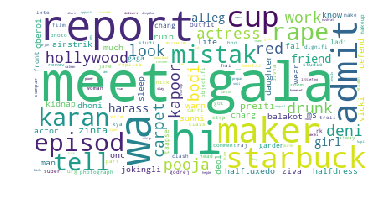

In [34]:
img = WordCloud(background_color='white').generate(stringlist)
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')